In [48]:
import pandas as pd
import numpy as np
table = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")
df = tables[2]
df.head()

,Country,IMF_Forecast,IMF_2024,WorldBank_Estimate,WorldBank_2023,UN_Estimate,UN_2022
0,World,109529216.0,2024.000000,105435540.0,2023.000000,100834796.0,2022.0
1,United States,28781083.0,2024.000000,27360935.0,2023.000000,25744100.0,2022.0
2,China,18532633.0,2023.962366,17794782.0,2022.903061,17963170.0,2022.0
3,Germany,4591100.0,2024.000000,4456081.0,2023.000000,4076923.0,2022.0
4,Japan,4110452.0,2024.000000,4212945.0,2023.000000,4232173.0,2022.0


In [38]:
df.columns

Index(['Country', 'IMF_Forecast', 'IMF_2024', 'WorldBank_Estimate',
       'WorldBank_2023', 'UN_Estimate', 'UN_2022'],
      dtype='object')

In [39]:
df.shape

(210, 7)

In [49]:
new_columns = [
    'Country', 
    'IMF_Forecast', 
    'IMF_2024', 
    'WorldBank_Estimate', 
    'WorldBank_2023', 
    'UN_Estimate', 
    'UN_2022'
]

df.columns = new_columns
df.head()

,Country,IMF_Forecast,IMF_2024,WorldBank_Estimate,WorldBank_2023,UN_Estimate,UN_2022
0,World,109529216.0,2024.000000,105435540.0,2023.000000,100834796.0,2022.0
1,United States,28781083.0,2024.000000,27360935.0,2023.000000,25744100.0,2022.0
2,China,18532633.0,2023.962366,17794782.0,2022.903061,17963170.0,2022.0
3,Germany,4591100.0,2024.000000,4456081.0,2023.000000,4076923.0,2022.0
4,Japan,4110452.0,2024.000000,4212945.0,2023.000000,4232173.0,2022.0


In [50]:
df = df[
    (df['IMF_2024'] == 2024) & 
    (df['WorldBank_2023'] == 2023) & 
    (df['UN_2022'] == 2022)
]


In [42]:
df.dtypes

Country                object
IMF_Forecast          float64
IMF_2024              float64
WorldBank_Estimate    float64
WorldBank_2023        float64
UN_Estimate           float64
UN_2022               float64
dtype: object

In [52]:
df.replace("—", np.nan)
print("ксть пропущених у кожному стовбці:")
print(df.isnull().sum())

ксть пропущених у кожному стовбці:
Country               0
IMF_Forecast          0
IMF_2024              0
WorldBank_Estimate    0
WorldBank_2023        0
UN_Estimate           0
UN_2022               0
dtype: int64


In [54]:
num_columns = ['IMF_Forecast', 'IMF_2024', 'WorldBank_Estimate', 'WorldBank_2023', 'UN_Estimate', 'UN_2022']
df.loc[:, num_columns] = df.loc[:, num_columns].apply(pd.to_numeric, errors='coerce')
df.loc[:, num_columns] = df.loc[:, num_columns].fillna(df[num_columns].mean())

In [55]:
print("ксть пропущених у кожному стовбці:")
print(df.isnull().sum())

ксть пропущених у кожному стовбці:
Country               0
IMF_Forecast          0
IMF_2024              0
WorldBank_Estimate    0
WorldBank_2023        0
UN_Estimate           0
UN_2022               0
dtype: int64


In [56]:
print(df.duplicated().sum())
df = df.drop_duplicates()

0


In [57]:
print(df.duplicated().sum())

0


In [58]:
df.describe()

,IMF_Forecast,IMF_2024,WorldBank_Estimate,WorldBank_2023,UN_Estimate,UN_2022
count,1.730000e+02,173.0,1.730000e+02,173.0,1.730000e+02,173.0
mean,1.144960e+06,2024.0,1.099545e+06,2023.0,1.047349e+06,2022.0
std,8.599875e+06,0.0,8.272107e+06,0.0,7.903346e+06,0.0
min,6.600000e+01,2024.0,6.200000e+01,2023.0,5.900000e+01,2022.0
25%,1.295300e+04,2024.0,1.314900e+04,2023.0,1.255800e+04,2022.0
50%,4.933400e+04,2024.0,4.853000e+04,2023.0,4.434100e+04,2022.0
75%,3.080550e+05,2024.0,3.308580e+05,2023.0,2.905270e+05,2022.0
max,1.095292e+08,2024.0,1.054355e+08,2023.0,1.008348e+08,2022.0


In [62]:
df['Difference'] = df['IMF_2024'] - df['WorldBank_2023']
max_difference_countries = df.loc[df['Difference'].abs().nlargest(10).index]
print("Топ 10 з відхиленням IMF_2024 і WorldBank_2023:")
print(max_difference_countries[['Country', 'IMF_2024', 'WorldBank_2023', 'Difference']])

Топ 10 з відхиленням IMF_2024 і WorldBank_2023:
           Country  IMF_2024  WorldBank_2023  Difference
0            World    2024.0          2023.0         1.0
1    United States    2024.0          2023.0         1.0
3          Germany    2024.0          2023.0         1.0
4            Japan    2024.0          2023.0         1.0
5            India    2024.0          2023.0         1.0
6   United Kingdom    2024.0          2023.0         1.0
7           France    2024.0          2023.0         1.0
8           Brazil    2024.0          2023.0         1.0
9            Italy    2024.0          2023.0         1.0
10          Canada    2024.0          2023.0         1.0


Таке поріняння немає сенсу так як в цих стовцях значення років :)
Нижче представленне альтернативне рішення з використанням естімейт

In [63]:
df['Difference'] = df['IMF_Forecast'] - df['WorldBank_Estimate']
max_difference_countries = df.loc[df['Difference'].abs().nlargest(10).index]
print("Топ 10 з відхиленням IMF_2024 і WorldBank_2023:")
print(max_difference_countries[['Country', 'IMF_2024', 'WorldBank_2023', 'Difference']])

Топ 10 з відхиленням IMF_2024 і WorldBank_2023:
           Country  IMF_2024  WorldBank_2023  Difference
0            World    2024.0          2023.0   4093676.0
1    United States    2024.0          2023.0   1420148.0
5            India    2024.0          2023.0    387092.0
12          Mexico    2024.0          2023.0    228138.0
8           Brazil    2024.0          2023.0    157725.0
6   United Kingdom    2024.0          2023.0    155229.0
3          Germany    2024.0          2023.0    135019.0
54         Nigeria    2024.0          2023.0   -110077.0
16       Indonesia    2024.0          2023.0    104519.0
4            Japan    2024.0          2023.0   -102493.0


In [67]:
correlation_matrix = df[['IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate']].corr()
print("матриця кореляцій:")
print(correlation_matrix)
high_correlation = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation = high_correlation[high_correlation < 1].nlargest(1)

print("Дві змінних з найбільшою кореляцією:")
print(high_correlation)

матриця кореляцій:
                    IMF_Forecast  WorldBank_Estimate  UN_Estimate
IMF_Forecast            1.000000            0.999987     0.999939
WorldBank_Estimate      0.999987            1.000000     0.999972
UN_Estimate             0.999939            0.999972     1.000000
Дві змінних з найбільшою кореляцією:
WorldBank_Estimate  IMF_Forecast    0.999987
dtype: float64


In [76]:
mean_imf = df['IMF_Forecast'].mean()
mean_wb = df['WorldBank_Estimate'].mean()
mean_un = df['UN_Estimate'].mean()
print("IMF:",mean_imf)
print("World Bank:",mean_wb)
print("UN:",mean_un)
change_24_23 = mean_imf - mean_wb
change_23_22 = mean_wb - mean_un
print("\nзміни 24-23 років:",change_24_23)
print("\nзміни 23-22 років:",change_23_22)

IMF: 1144959.8786127167
World Bank: 1099545.0462427745
UN: 1047349.0404624278

зміни 24-23 років: 45414.83236994222

зміни 23-22 років: 52196.00578034669


In [78]:
df['std_dev'] = df[['IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate']].std(axis=1)
var_country = df.loc[df['std_dev'].idxmax()]
print("Країна з найбільшим відхиленням по рокам:")
print(var_country['Country'])

Країна з найбільшим відхиленням по рокам:
World


In [79]:
max_imf = df.loc[df['IMF_Forecast'].idxmax()]
min_imf = df.loc[df['IMF_Forecast'].idxmin()]
max_wb = df.loc[df['WorldBank_Estimate'].idxmax()]
min_wb = df.loc[df['WorldBank_Estimate'].idxmin()]
max_un = df.loc[df['UN_Estimate'].idxmax()]
min_un = df.loc[df['UN_Estimate'].idxmin()]
print("Країна з найвищим показником для IMF_Forecast:")
print("Країна:", max_imf['Country'], ", Показник:", max_imf['IMF_Forecast'])
print("\nКраїна з найнижчим показником для IMF_Forecast:")
print("Країна:", min_imf['Country'], ", Показник:", min_imf['IMF_Forecast'])

print("\nКраїна з найвищим показником для WorldBank_Estimate:")
print("Країна:", max_wb['Country'], ", Показник:", max_wb['WorldBank_Estimate'])
print("\nКраїна з найнижчим показником для WorldBank_Estimate:")
print("Країна:", min_wb['Country'], ", Показник:", min_wb['WorldBank_Estimate'])

print("\nКраїна з найвищим показником для UN_Estimate:")
print("Країна:", max_un['Country'], ", Показник:", max_un['UN_Estimate'])
print("\nКраїна з найнижчим показником для UN_Estimate:")
print("Країна:", min_un['Country'], ", Показник:", min_un['UN_Estimate'])

Країна з найвищим показником для IMF_Forecast:
Країна: World , Показник: 109529216.0

Країна з найнижчим показником для IMF_Forecast:
Країна: Tuvalu , Показник: 66.0

Країна з найвищим показником для WorldBank_Estimate:
Країна: World , Показник: 105435540.0

Країна з найнижчим показником для WorldBank_Estimate:
Країна: Tuvalu , Показник: 62.0

Країна з найвищим показником для UN_Estimate:
Країна: World , Показник: 100834796.0

Країна з найнижчим показником для UN_Estimate:
Країна: Tuvalu , Показник: 59.0


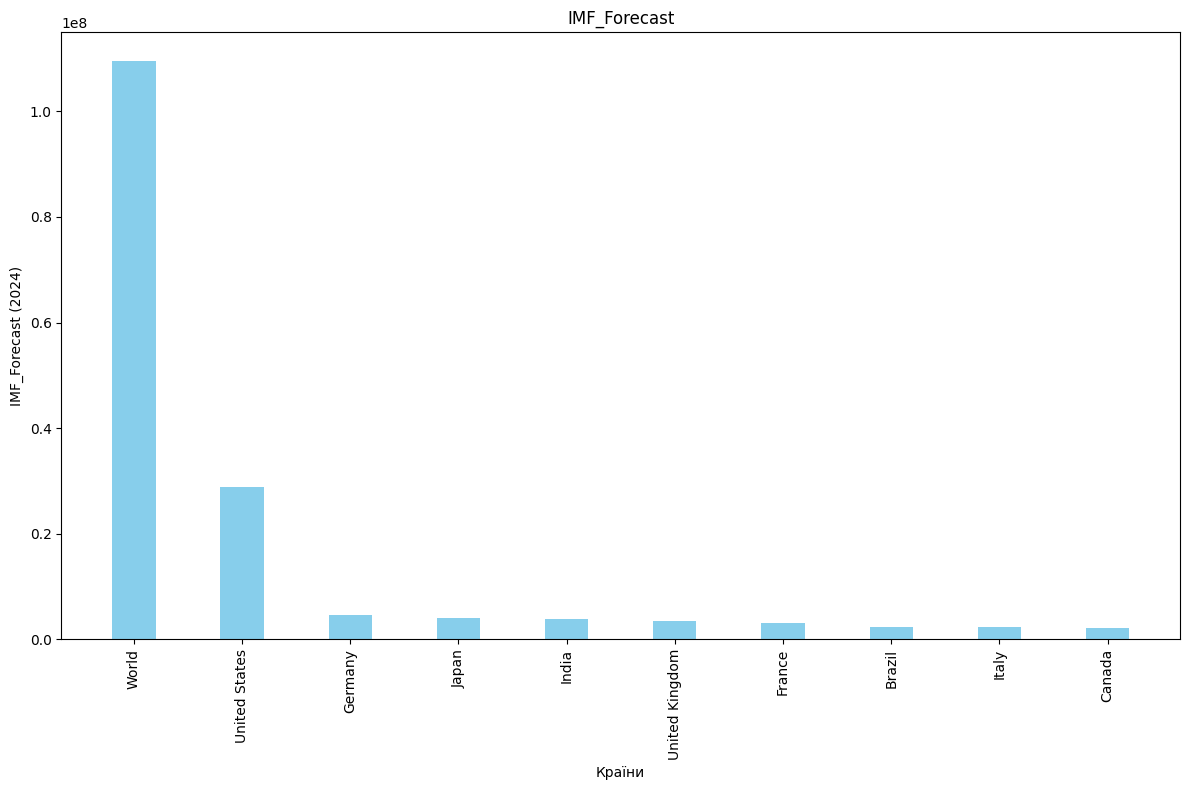

In [84]:
import matplotlib.pyplot as plt
df_top_10 = df.head(10)
plt.figure(figsize=(12, 8))
positions = np.arange(len(df_top_10['Country'])) * 2  
plt.bar(positions, df_top_10['IMF_Forecast'], color='skyblue', width=0.8)
plt.xticks(positions, df_top_10['Country'], rotation=90)
plt.title('IMF_Forecast')
plt.xlabel('Країни')
plt.ylabel('IMF_Forecast (2024)')
plt.tight_layout()
plt.show()

In [86]:
total_imf = df['IMF_Forecast'].sum()
total_wb = df['WorldBank_Estimate'].sum()
total_un = df['UN_Estimate'].sum()

df['Share_IMF_2024'] = df['IMF_Forecast'] / total_imf
df['Share_WB_2023'] = df['WorldBank_Estimate'] / total_wb
df['Share_UN_2022'] = df['UN_Estimate'] / total_un

print("частки країн в загальному значенні для кожного року:")
print(df[['Country', 'Share_IMF_2024', 'Share_WB_2023', 'Share_UN_2022']].head())

df['Change_IMF_WB'] = df['Share_IMF_2024'] - df['Share_WB_2023']
df['Change_WB_UN'] = df['Share_WB_2023'] - df['Share_UN_2022']

print("\nЗміни часток між 2024 і 2023:")
print(df[['Country', 'Change_IMF_WB']].sort_values(by='Change_IMF_WB', ascending=False).head(10))

print("\nЗміни часток між 2023 і 2022:")
print(df[['Country', 'Change_WB_UN']].sort_values(by='Change_WB_UN', ascending=False).head(10))

частки країн в загальному значенні для кожного року:
         Country  Share_IMF_2024  Share_WB_2023  Share_UN_2022
0          World        0.552960       0.554278       0.556510
1  United States        0.145302       0.143837       0.142082
3        Germany        0.023178       0.023426       0.022501
4          Japan        0.020752       0.022148       0.023357
5          India        0.019876       0.018662       0.019126

Зміни часток між 2024 і 2023:
          Country  Change_IMF_WB
1   United States       0.001464
5           India       0.001214
12         Mexico       0.000779
8          Brazil       0.000343
16      Indonesia       0.000242
35           Iran       0.000233
58       Ethiopia       0.000175
37       Malaysia       0.000148
49     Kazakhstan       0.000124
31         Norway       0.000108

Зміни часток між 2023 і 2022:
           Country  Change_WB_UN
1    United States      0.001755
12          Mexico      0.001328
3          Germany      0.000925
8           

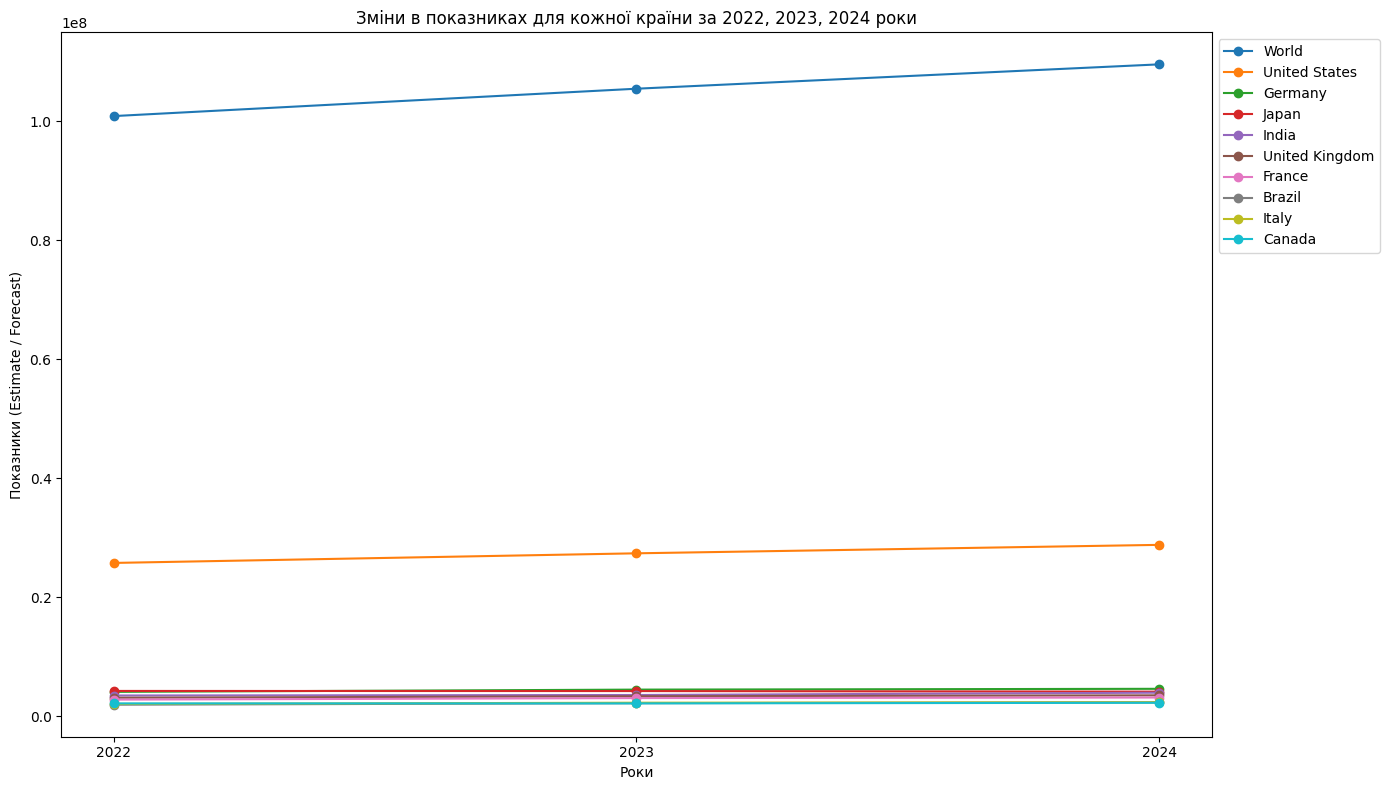

In [87]:
df_top_10 = df.head(10)
plt.figure(figsize=(14, 8))

for index, row in df_top_10.iterrows():
    plt.plot(['2022', '2023', '2024'], 
             [row['UN_Estimate'], row['WorldBank_Estimate'], row['IMF_Forecast']], 
             marker='o', label=row['Country'])

plt.title('Зміни в показниках для кожної країни за 2022, 2023, 2024 роки')
plt.xlabel('Роки')
plt.ylabel('Показники (Estimate / Forecast)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

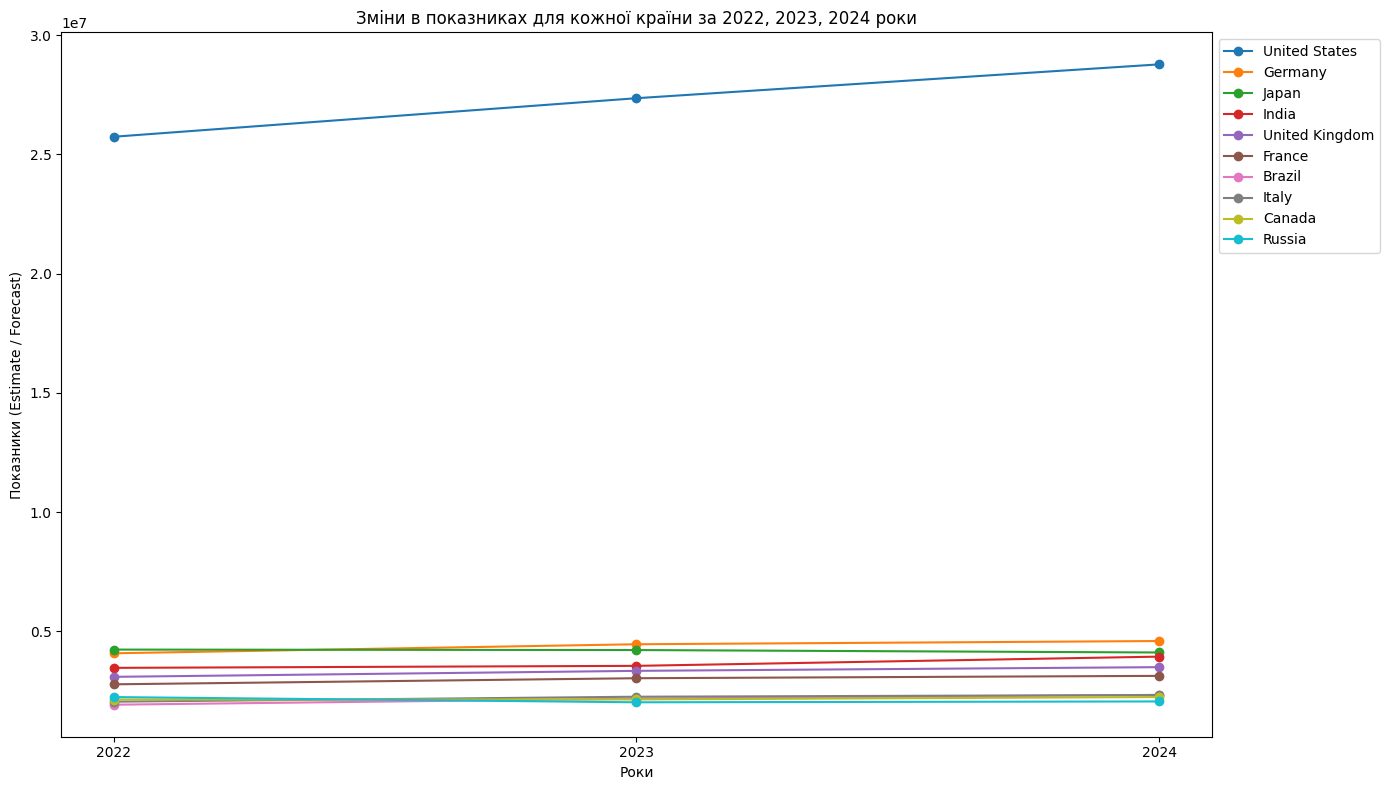

In [88]:
df = df[df['Country'] != 'World']
df_top_10 = df.head(10)
plt.figure(figsize=(14, 8))

for index, row in df_top_10.iterrows():
    plt.plot(['2022', '2023', '2024'], 
             [row['UN_Estimate'], row['WorldBank_Estimate'], row['IMF_Forecast']], 
             marker='o', label=row['Country'])

plt.title('Зміни в показниках для кожної країни за 2022, 2023, 2024 роки')
plt.xlabel('Роки')
plt.ylabel('Показники (Estimate / Forecast)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Спробував прибрати рядок World, щоб краще було видно результати по країнам, але вийшла аналогічна ситуація але з америкою)
Висновок: Загальний аналіз показав різні тенденції серед країн, ріст, спад та варіантивність показників між роками.

Завдання 2

In [90]:
df_titanic = pd.read_csv(r'C:\Users\faika\Downloads\titanic.csv')

In [92]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
df_titanic.shape

(418, 12)

In [94]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [95]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [97]:
numeric_columns = df_titanic.select_dtypes(include=['float64', 'int64']).columns
df_titanic[numeric_columns] = df_titanic[numeric_columns].fillna(df_titanic[numeric_columns].mean())

In [98]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [99]:
df_titanic['Cabin']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [104]:
df_titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [101]:
df_titanic = df_titanic.drop_duplicates()

In [105]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [106]:
df_titanic.drop(columns=['Cabin'], inplace=True)

In [125]:
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df_selected = df_titanic[selected_columns]
df_selected

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,34.50000,7.8292
1,1,3,0,47.00000,7.0000
2,0,2,1,62.00000,9.6875
3,0,3,1,27.00000,8.6625
4,1,3,0,22.00000,12.2875
...,...,...,...,...,...
413,0,3,1,30.27259,8.0500
414,1,1,0,39.00000,108.9000
415,0,3,1,38.50000,7.2500
416,0,3,1,30.27259,8.0500


In [127]:
print(df_selected['Sex'].unique())

[1 0]


In [129]:
df_selected['Sex'] = df_selected['Sex'].map({'male': 1, 'female': 0})
print(df_selected['Sex'].unique())

[nan]


C:\Users\faika\AppData\Local\Temp\ipykernel_37804\2675550125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sex'] = df_selected['Sex'].map({'male': 1, 'female': 0})


In [132]:
df_selected.isna().sum()

Survived      0
Pclass        0
Sex         418
Age           0
Fare          0
dtype: int64

In [112]:
print('перші 5 рядків')
df_titanic.head()

перші 5 рядків


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [113]:
print('останні 5 рядків')
df_titanic.tail()

останні 5 рядків


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,S
417,1309,0,3,"Peter, Master. Michael J",1,30.27259,1,1,2668,22.3583,C


In [123]:
df_titanic.groupby('Sex')['Survived']